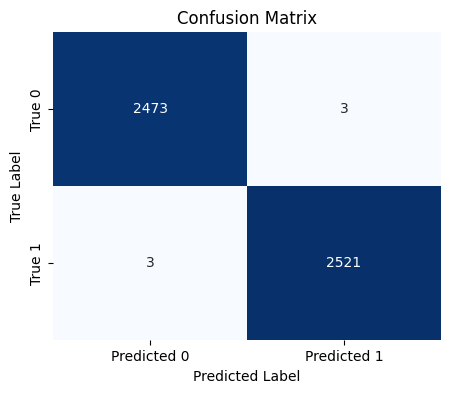

Accuracy: 0.9988
Confusion Matrix:
[[2473    3]
 [   3 2521]]


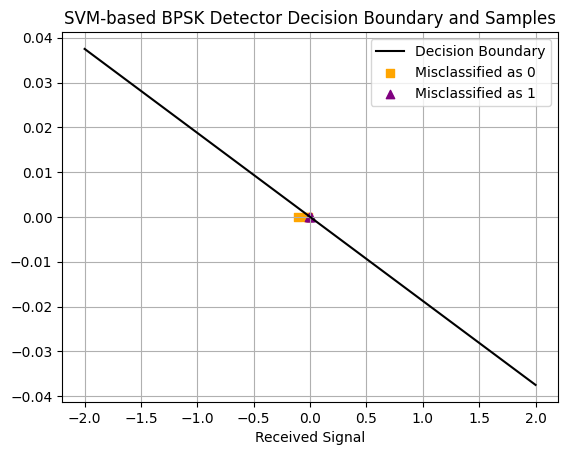

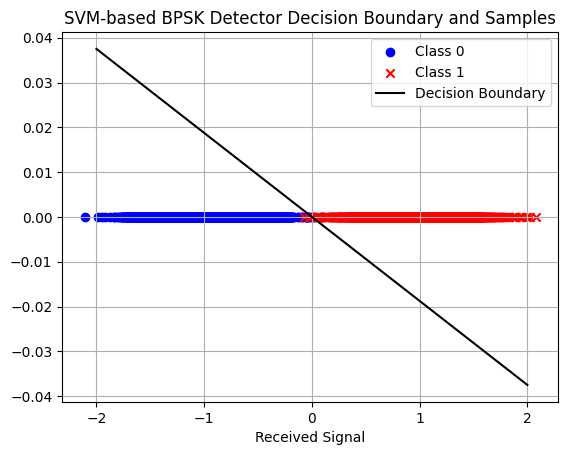

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: BPSK Modulation function
def bpsk_modulation(bits):
    return 2 * bits - 1

# Step 2: AWGN Channel function
def add_awgn_noise(signal, snr_dB):
    snr_linear = 10**(snr_dB / 10.0)
    signal_power = np.mean(signal**2)
    noise_power = signal_power / snr_linear
    noise = np.random.normal(0, np.sqrt(noise_power), signal.shape)
    return signal + noise

# Step 3: Generate Training Dataset
def generate_dataset(num_samples, snr_dB):
    bits = np.random.randint(0, 2, num_samples)
    modulated_signal = bpsk_modulation(bits)
    received_signal = add_awgn_noise(modulated_signal, snr_dB)
    return received_signal, bits

# Step 4: Preprocess Data (Normalization)
def preprocess_data(received_signal):
    return received_signal / np.sqrt(np.mean(received_signal**2))

# Step 5: Train SVM Detector
def train_svm_detector(X_train, y_train):
    clf = svm.SVC(kernel='linear')
    clf.fit(X_train, y_train)
    return clf

# Step 6: Test SVM Detector
def test_svm_detector(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    misclassified_as_0_indices = np.where((y_pred == 0) & (y_test == 1))[0]
    misclassified_as_1_indices = np.where((y_pred == 1) & (y_test == 0))[0]
    return y_pred, misclassified_as_0_indices, misclassified_as_1_indices


# Step 7: Performance Evaluation
def evaluate_performance(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    confusion_mat = confusion_matrix(y_true, y_pred)
     # Create a colorful confusion matrix using seaborn
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Predicted 0", "Predicted 1"],
                yticklabels=["True 0", "True 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
    return accuracy, confusion_mat

# Step 8: Generate Training and Testing Datasets
num_train_samples = 10000
num_test_samples = 5000
snr_dB = 10

X_train, y_train = generate_dataset(num_train_samples, snr_dB)
X_test, y_test = generate_dataset(num_test_samples, snr_dB)

# Step 9: Preprocess Data
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

# Step 10: Train SVM Detector
clf = train_svm_detector(X_train.reshape(-1, 1), y_train)

# Step 11: Test SVM Detector
y_pred, misclassified_as_0_indices, misclassified_as_1_indices = test_svm_detector(clf, X_test.reshape(-1, 1), y_test)

# Step 12: Evaluate Performance
accuracy, confusion_mat = evaluate_performance(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion_mat)

# Plot decision boundary

decision_boundary_x = np.linspace(-2, 2, 100)
decision_boundary_y = (-clf.intercept_[0] / clf.coef_[0]) * decision_boundary_x
plt.plot(decision_boundary_x, decision_boundary_y, 'k-', label='Decision Boundary')

plt.scatter(X_test[misclassified_as_0_indices], np.zeros_like(X_test[misclassified_as_0_indices]), label='Misclassified as 0', marker='s', color='orange')
plt.scatter(X_test[misclassified_as_1_indices], np.zeros_like(X_test[misclassified_as_1_indices]), label='Misclassified as 1', marker='^', color='purple')

plt.xlabel('Received Signal')
plt.title('SVM-based BPSK Detector Decision Boundary and Samples')
plt.legend()
plt.grid(True)
plt.show()
# Plot samples
plt.scatter(X_train[y_train == 0], np.zeros_like(X_train[y_train == 0]), label='Class 0', marker='o', color='blue')
plt.scatter(X_train[y_train == 1], np.zeros_like(X_train[y_train == 1]), label='Class 1', marker='x', color='red')
plt.plot(decision_boundary_x, decision_boundary_y, 'k-', label='Decision Boundary')

plt.xlabel('Received Signal')
plt.title('SVM-based BPSK Detector Decision Boundary and Samples')
plt.legend()
plt.grid(True)
plt.show()